# PFG - Gestión de Proyectos

# 1. Carga de datos

In [ ]:
import pandas as pd

#### Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files

# Sube el archivo CSV
uploaded = files.upload()


Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation.csv


In [ ]:
import io  # Import io module to handle file content

# Extrae el contenido del archivo CSV del diccionario
csv_content = next(iter(uploaded.values()))

# Intenta leer el archivo CSV con diferentes codificaciones
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv(io.StringIO(csv_content.decode(encoding)), sep=';')
        print("Archivo CSV leído exitosamente con la codificación:", encoding)
        break
    except UnicodeDecodeError:
        print("Error al leer el archivo CSV con la codificación:", encoding)

df.head()

Archivo CSV leído exitosamente con la codificación: utf-8


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### Visual Studio

In [ ]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv', sep=';')

In [ ]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Objetivo Principal

El objetivo esencial es maximizar la aceptación de cupones por parte de los usuarios. Esto no solo aumenta el valor que se ofrecerá a los clientes (las empresas que promocionan sus productos o servicios a través de cupones), sino que también mejorará la experiencia del consumidor final, asegurando que reciban ofertas que sean de su interés y relevancia. Para lograr este objetivo, es crucial entender los factores que influyen en la decisión de los usuarios de aceptar un cupón y cómo podemos utilizar esta información para afinar las estrategias de marketing

# Descripcion de las variables

### Información Demográfica

* Edad (age): Proporciona información sobre el rango de edad del conductor, lo cual puede influir en sus preferencias de consumo y en su disposición a aceptar ciertos tipos de cupones.
* Género (gender): El género del conductor puede afectar las preferencias de productos o servicios, y por ende, la aceptación de cupones.
* Estado Civil (maritalStatus): El estado civil puede reflejar diferentes patrones de consumo o necesidades, influenciando qué ofertas son más atractivas.
* Nivel Educativo (education): El nivel de educación alcanzado puede correlacionarse con el poder adquisitivo o intereses específicos, afectando la respuesta a ciertos tipos de cupones.
* Ingresos (income): El rango de ingresos del conductor puede determinar su capacidad de gasto y, por tanto, su probable interés en ofertas específicas.

### Información sobre hábitos de consumo

* Frecuencia de visitas a bares (Bar): Indica con qué frecuencia el conductor visita bares, lo que puede ser relevante para cupones relacionados con bebidas o eventos sociales.
* Frecuencia de visitas a cafeterías (CoffeeHouse): Refleja la predisposición del conductor a consumir en cafeterías, útil para cupones de café o snacks.
* Frecuencia de pedidos de comida para llevar (CarryAway): Muestra la preferencia por la comida rápida o para llevar, importante para cupones de restaurantes o servicios de entrega.
* Frecuencia de visitas a restaurantes con gastos menores a $20 (RestaurantLessThan20) y entre $20 y $50 (Restaurant20To50): Estas características indican las preferencias de consumo en restaurantes y pueden ayudar a personalizar ofertas de cupones según el rango de gasto habitual del conductor.

### Información contextual sobre el viaje

* Destino (destination): La ubicación o propósito del viaje puede afectar la relevancia de los cupones ofrecidos, como ofertas para el hogar en viajes de regreso.
* Pasajeros (passanger): La compañía en el vehículo (amigos, hijos) puede influir en la decisión de aceptar cupones, especialmente para actividades grupales o familiares.
* Clima (weather) y Temperatura (temperature): Las condiciones meteorológicas y la temperatura pueden afectar la atracción hacia ciertas actividades o consumos, como bebidas calientes en días fríos.
* Tiempo (time): El momento del día puede determinar la relevancia de un cupón, como ofertas de desayuno por la mañana.

### Detalles específicos de la oferta del cupón

* Tipo de cupón (coupon): La categoría del cupón (restaurante, cafetería, etc.) es crucial para su atractivo y relevancia para el conductor.
* Expiración (expiration): El tiempo disponible para usar el cupón puede urgir al conductor a aceptarlo o rechazarlo basándose en su conveniencia.
* Distancia hasta el cupón (toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min): La proximidad de la oferta al conductor influye en la probabilidad de aceptación, especialmente si requiere un desvío.

# Análisis Exploratorio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [ ]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Verificar qué columnas contienen valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()

print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos, NaN o celdas vacías:
['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [ ]:
# Obtener el número de filas nulas para cada columna
for columna in columnas_con_nulos:
    num_nulos = df[columna].isnull().sum()
    print(f"Número de filas nulas en la columna '{columna}': {num_nulos}")

Número de filas nulas en la columna 'car': 12576
Número de filas nulas en la columna 'Bar': 107
Número de filas nulas en la columna 'CoffeeHouse': 217
Número de filas nulas en la columna 'CarryAway': 151
Número de filas nulas en la columna 'RestaurantLessThan20': 130
Número de filas nulas en la columna 'Restaurant20To50': 189


In [ ]:
df.isna().sum() # suma de nulls en cada columna

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [ ]:
df.isna().sum() / len(df) * 100 # porcentaje de nulls en cada columna

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

cars tiene el 99% de datos nulos

In [ ]:
y  = df['Y'].value_counts()
y

1    7210
0    5474
Name: Y, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
px.bar(y, title = 'Variable Target')

la variable obejtivo esta desbalanceada, pero no es muy diferente. Se puede tratar de hacer oversampling o seguir y ver como resulta el modelo.

In [ ]:
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [ ]:

for i in df.columns:
  print(i)
  fig = px.histogram(df, x=i)
  fig.show()

destination


passanger


weather


temperature


time


coupon


expiration


gender


age


maritalStatus


has_children


education


occupation


income


car


Bar


CoffeeHouse


CarryAway


RestaurantLessThan20


Restaurant20To50


toCoupon_GEQ5min


toCoupon_GEQ15min


toCoupon_GEQ25min


direction_same


direction_opp


Y


array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'toCoupon_GEQ5min'}>],
       [<Axes: title={'center': 'toCoupon_GEQ15min'}>,
        <Axes: title={'center': 'toCoupon_GEQ25min'}>,
        <Axes: title={'center': 'direction_same'}>],
       [<Axes: title={'center': 'direction_opp'}>,
        <Axes: title={'center': 'Y'}>, <Axes: >]], dtype=object)

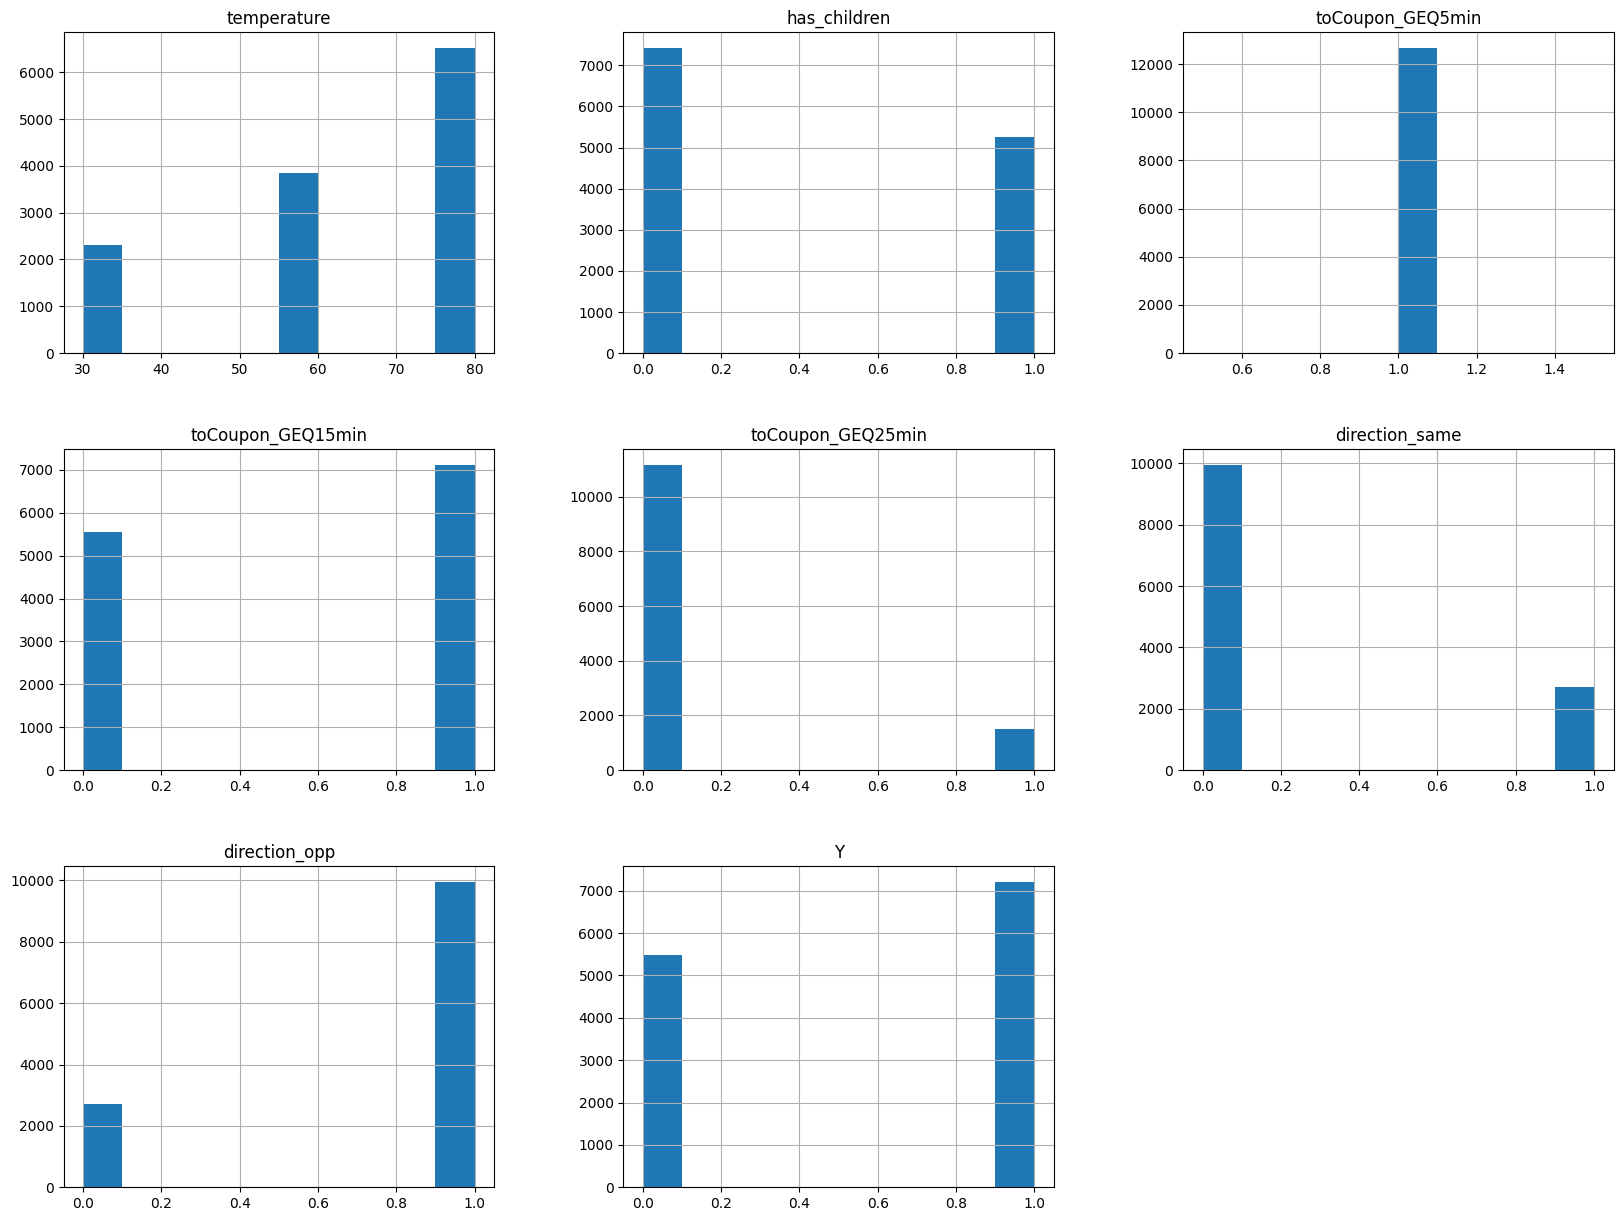

In [ ]:
df.hist(figsize=(20, 15))